# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# style to use

In [2]:
color_pal = sns.color_palette('deep')
plt.style.use('dark_background')

# IMPORT DATASET

In [3]:
df = pd.read_csv('cinemaTicket_Ref.csv')

In [4]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date
0,1573,448,695189993,4679,0,24,89.21,148576.61740,4679,5245.0,2018-10-12
1,1554,304,618150000,4223,22,24,88.25,146376.98320,4201,4785.0,2018-07-20
2,1483,448,580189998,4091,0,24,72.59,141821.07020,4091,5636.0,2018-04-04
3,1483,448,322264998,4030,0,23,76.94,79966.50074,4030,5238.0,2018-04-10
4,1483,448,574485991,3865,0,21,77.56,148638.03130,3865,4983.0,2018-03-29


In [5]:
df.shape

(142309, 11)

In [6]:
df.info

<bound method DataFrame.info of         film_code  cinema_code  total_sales  tickets_sold  tickets_out  \
0            1573          448    695189993          4679            0   
1            1554          304    618150000          4223           22   
2            1483          448    580189998          4091            0   
3            1483          448    322264998          4030            0   
4            1483          448    574485991          3865            0   
...           ...          ...          ...           ...          ...   
142304       1556          543        50000             1            0   
142305       1500          546        80000             1            0   
142306       1512          556       120000             1            0   
142307       1512          556       120000             1            0   
142308       1564          556       120000             1            0   

        show_time  occu_perc  ticket_price  ticket_use  capacity        date  


In [7]:
df.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity
count,142309.000000,142309.000000,1.423090e+05,142309.000000,142309.000000,142309.000000,142184.000000,142309.000000,142309.000000,142184.000000
mean,1518.950579,320.138895,1.189867e+07,136.476646,0.232761,3.890077,19.904679,81176.935067,136.243885,850.113311
std,36.179029,159.699611,2.672698e+07,254.136202,2.911926,2.850235,22.605969,33208.899039,253.950428,943.469886
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.000000
50%,1498.000000,324.000000,3.710000e+06,50.000000,0.000000,3.000000,10.330000,79375.000000,50.000000,521.000000
75%,1556.000000,474.000000,1.104000e+07,142.000000,0.000000,5.000000,28.090000,100000.000000,142.000000,1032.000000
max,1589.000000,637.000000,6.951900e+08,4679.000000,311.000000,24.000000,147.500000,700000.000000,4679.000000,8469.000000


# Sorting Missing values

In [8]:
df.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
dtype: int64

In [9]:
missingV = df.isnull().sum().sort_values(ascending=False)
missingV = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissingValNum'])

In [10]:
missingV['Percent'] = missingV.MissingValNum.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100))
missingV = missingV[missingV.MissingValNum > 0]

In [11]:
print(missingV)

           MissingValNum Percent
occu_perc            125    0.09
capacity             125    0.09


# plot the dataset

## convert 'date' column to pandas datetime format

In [12]:
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

# group the data by 'date' and sum the 'total_sales' values for each date

In [13]:
sales_by_date = df.groupby('date')['total_sales'].sum()
plt.figure(figsize=(12,6)) # Set the size of the plot

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

# plot the sales data

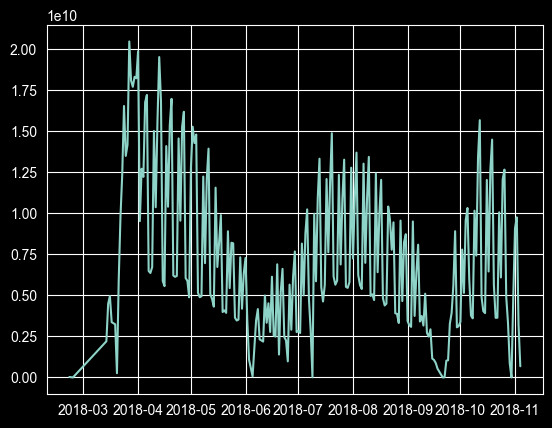

In [14]:
plt.plot(sales_by_date.index, sales_by_date.values)

# Plot the data

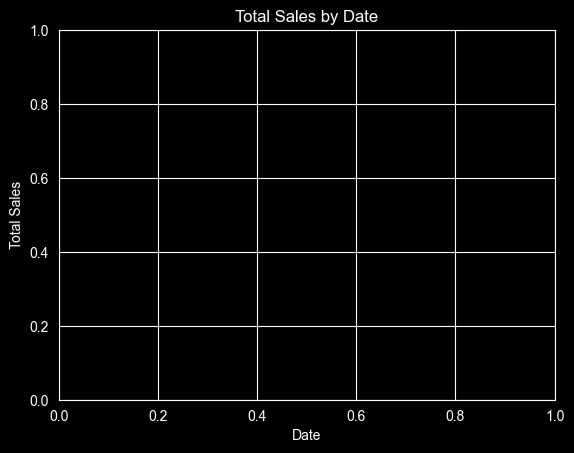

In [15]:
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales by Date')
plt.show()


## using histplot

<BarContainer object of 234 artists>

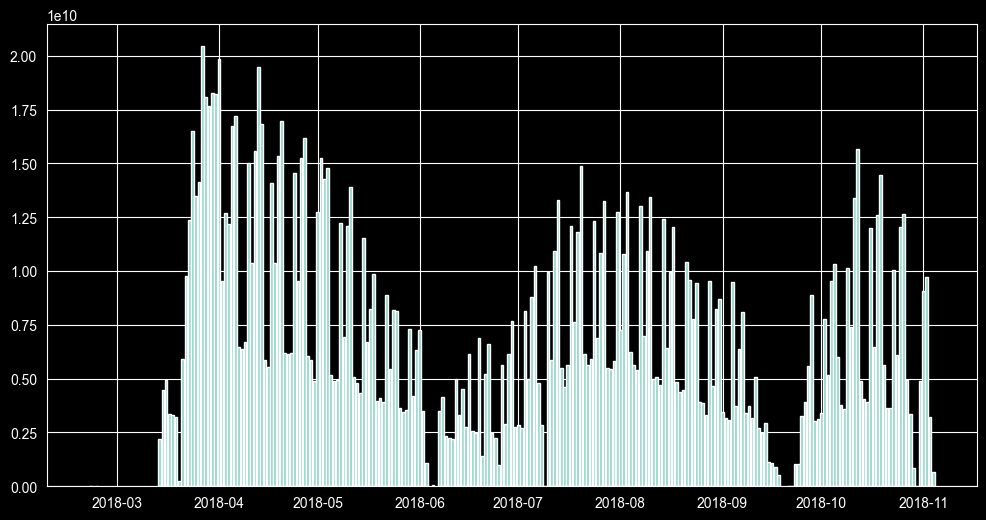

In [16]:
plt.figure(figsize=(12,6))
plt.bar(sales_by_date.index, sales_by_date.values)


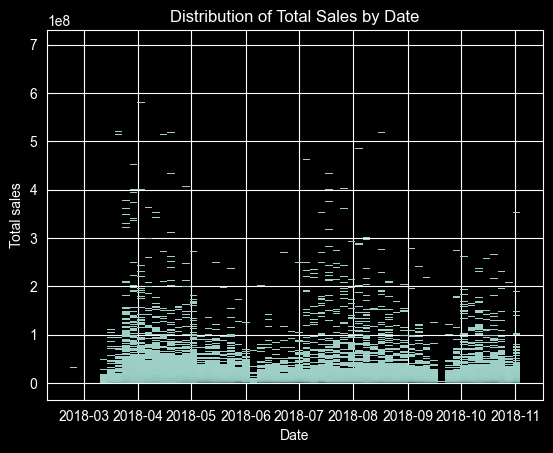

In [17]:
# plot the total sales against the date
sns.histplot(data=df, x='date', y='total_sales')
plt.xlabel('Date')
plt.ylabel('Total sales')
plt.title('Distribution of Total Sales by Date')
plt.show()

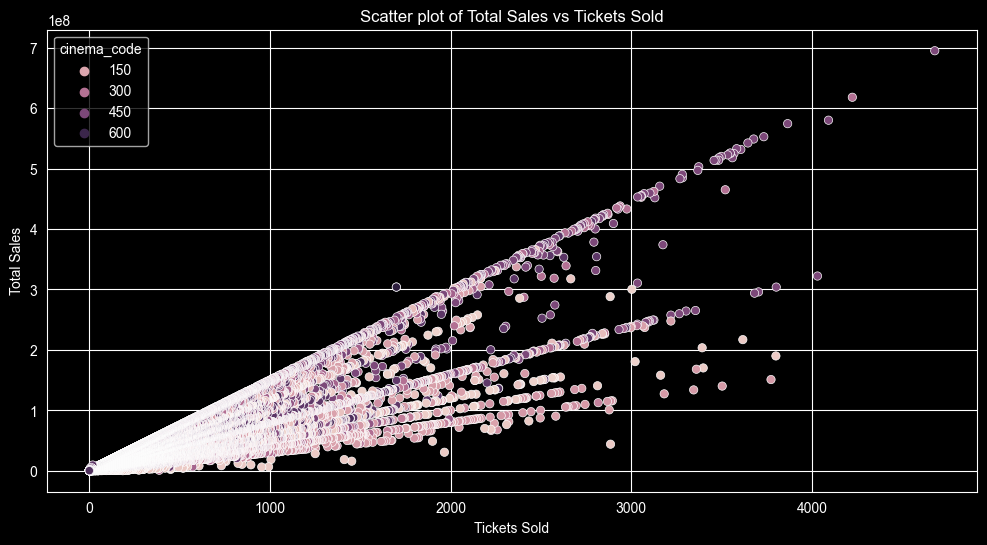

In [18]:
#using histplot
plt.figure(figsize=(12,6))
# Create a sample dataframe
df= pd.read_csv('cinemaTicket_Ref.csv')
# Plot the scatter plot
sns.scatterplot(data=df, x='tickets_sold', y='total_sales', hue='cinema_code')

# Set the axis labels and title
plt.xlabel('Tickets Sold')
plt.ylabel('Total Sales')
plt.title('Scatter plot of Total Sales vs Tickets Sold')

# Show the plot
plt.show()

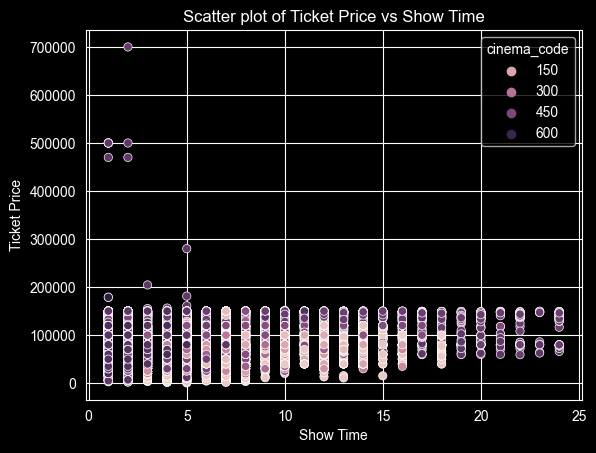

In [19]:

# Plot the scatter plot
sns.scatterplot(data=df, x='show_time', y='ticket_price', hue='cinema_code')

# Set the axis labels and title
plt.xlabel('Show Time')
plt.ylabel('Ticket Price')
plt.title('Scatter plot of Ticket Price vs Show Time')

# Show the plot
plt.show()

# spliting the dataset

In [20]:
# convert 'date' column to pandas datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')


In [21]:
# sort the dataframe by date
df = df.sort_values('date')

In [22]:
# define the size of the test set
test_size = 0.2

In [23]:
# calculate the index to split the data
split_index = int(len(df) * (1 - test_size))


In [24]:
# split the data into training and test sets
train = df[:split_index]
test = df[split_index:]

# Plot the Data

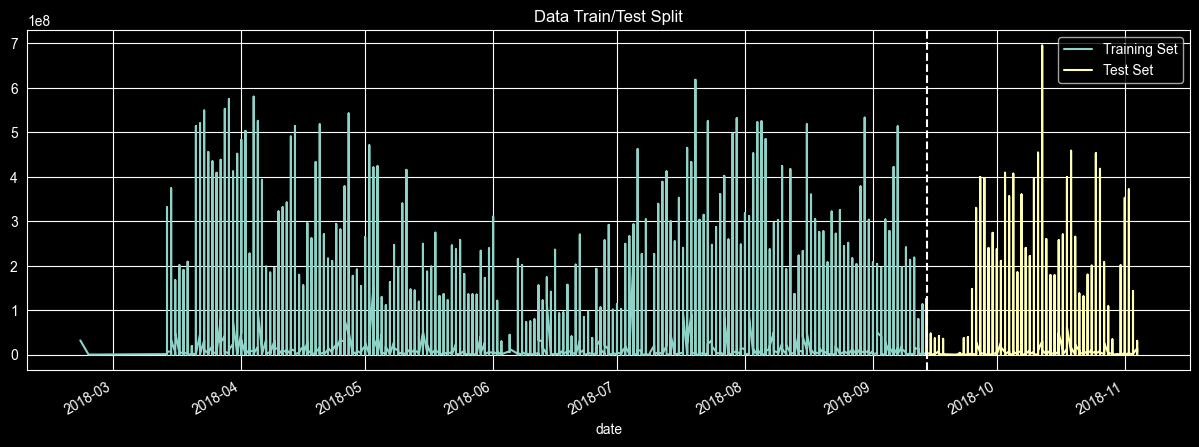

In [25]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(x='date', y='total_sales', ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(x='date', y='total_sales', ax=ax, label='Test Set')
ax.axvline(train['date'].max(), color='white', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [26]:
df = pd.read_csv('cinemaTicket_Ref.csv')

In [27]:
# set the target and predictors
y = df.total_sales #target

In [28]:
# use only those input features with numeric data type
df_temp = df.select_dtypes(include=["int64"])
X = df_temp.drop(["total_sales",],axis=1)  # predictors

In [29]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 3)

# Define the parameter grid

In [30]:

params = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 6, 9],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create an instance of the XGBRegressor class

In [31]:

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)


# Create a GridSearchCV object

In [32]:
grid_search = GridSearchCV(xgb_model, param_grid=params, cv=5, verbose=2)

# Fit the GridSearchCV object on the training data

In [33]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.1, 0.01], 'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             verbose=2)

In [34]:
# Get the best performing model from GridSearchCV
best_model = grid_search.best_estimator_

In [35]:
# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

In [36]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = best_model.score(X_test, y_test)

In [37]:
print('MSE:', mse)

MSE: 49282346988652.85


In [38]:
print('R-squared:', r2)

R-squared: 0.9340524200069344


In [39]:
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}



# Make predictions for the next 3 months

In [40]:
df = pd.read_csv('cinemaTicket_Ref.csv')

In [41]:
import pandas as pd

# Create a datetime object from a string
date_str = '2022-01-01'
date = pd.to_datetime(date_str)

# Add a Timedelta object to the datetime object
new_date = date + pd.Timedelta(days=1)

print(new_date)


2022-01-02 00:00:00


In [42]:
future_dates = pd.date_range(start=pd.to_datetime(df['date']).max() + pd.Timedelta(days=1), periods=3, freq='M')


In [43]:
future_sales = pd.DataFrame({'date': future_dates, 'film_code': 0, 'cinema_code': 0, 'tickets_sold': 0, 'tickets_out': 0, 'show_time': 0, 'ticket_use': 0})

In [44]:
# Set the date column as the index
future_sales = future_sales.set_index('date')

# Predict the total sales for the next 3 months using the best model

In [45]:
future_sales['total_sales'] = best_model.predict(future_sales)
future_sales['total_sales'] = future_sales['total_sales'].astype(str)

In [46]:
# Combine the test results and future sales dataframes
all_results = pd.concat([df[['date', 'total_sales']], future_sales], axis=0)

In [47]:
# Set the date column as the index
all_results = all_results.set_index('date')

In [48]:
print(all_results)

           total_sales  film_code  cinema_code  tickets_sold  tickets_out  \
date                                                                        
2018-10-12   695189993        NaN          NaN           NaN          NaN   
2018-07-20   618150000        NaN          NaN           NaN          NaN   
2018-04-04   580189998        NaN          NaN           NaN          NaN   
2018-04-10   322264998        NaN          NaN           NaN          NaN   
2018-03-29   574485991        NaN          NaN           NaN          NaN   
...                ...        ...          ...           ...          ...   
2018-07-28      120000        NaN          NaN           NaN          NaN   
2018-08-23      120000        NaN          NaN           NaN          NaN   
NaN          2467565.0        0.0          0.0           0.0          0.0   
NaN          2467565.0        0.0          0.0           0.0          0.0   
NaN          2467565.0        0.0          0.0           0.0          0.0   

In [49]:
all_results['total_sales'] = all_results['total_sales'].astype(float)


In [50]:
print(all_results['total_sales'])

date
2018-10-12    695189993.0
2018-07-20    618150000.0
2018-04-04    580189998.0
2018-04-10    322264998.0
2018-03-29    574485991.0
                 ...     
2018-07-28       120000.0
2018-08-23       120000.0
NaN             2467565.0
NaN             2467565.0
NaN             2467565.0
Name: total_sales, Length: 142312, dtype: float64


In [51]:
print(all_results['total_sales'].dtype)


float64


# Plot the actual and predicted sales for the next 3 months

Text(0, 0.5, 'Total Sales')

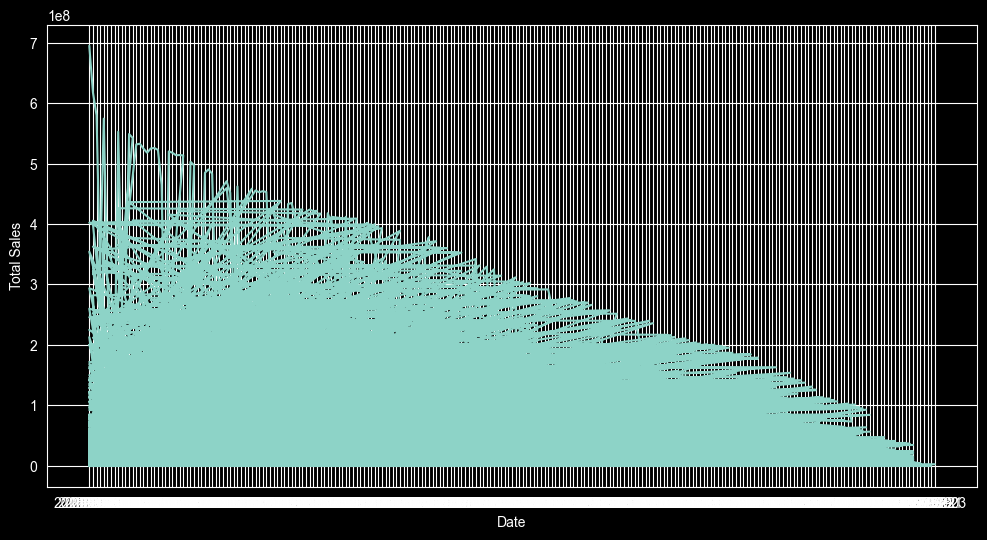

In [52]:
all_results.index = all_results.index.astype(str)
all_results['total_sales'] = all_results['total_sales'].astype(float)

plt.figure(figsize=(12,6))
plt.plot(all_results.index, all_results['total_sales'], label='Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')

